In [5]:
import matplotlib.pyplot as plt
from math import pow
import numpy

# All the data could be downloaded from: https://1drv.ms/f/s!Ao2ItRTtXaxehiA2DdroBpFMIqL_

In [6]:
def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02):
    Q=Q.T  
    error_result=[]
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    eij=R[i][j]-numpy.dot(P[i,:],Q[:,j]) # .dot(P,Q) 行列の内積
                    for k in range(K):
                        P[i][k]=P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
                        Q[k][j]=Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])
        eR=numpy.dot(P,Q)
        e=0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j]>0:
                    e=e+pow(R[i][j]-numpy.dot(P[i,:],Q[:,j]),2)
                    for k in range(K):
                        e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
        error_result.append(e)
        if e<0.001:
            break
    return P,Q.T,error_result

In [7]:
R=[
        [5,3,0,1,2],
        [4,0,0,1,0],
        [1,1,0,5,3],
        [1,0,0,4,1],
        [0,1,5,4,2],
        [5,3,0,2,1],
        [0,1,1,3,1],
]

R=numpy.array(R)
N=len(R)
M=len(R[0])
K=5

P=numpy.random.rand(N,K) #ランダムで初期化
Q=numpy.random.rand(M,K) #ランダムで初期化

nP,nQ,error_result=matrix_factorization(R,P,Q,K)
print("最初のスコア行列は：\n",R)
R_MF=numpy.dot(nP,nQ.T)
print("\nMFでのスコア行列R_MFは：\n",R_MF)

最初のスコア行列は：
 [[5 3 0 1 2]
 [4 0 0 1 0]
 [1 1 0 5 3]
 [1 0 0 4 1]
 [0 1 5 4 2]
 [5 3 0 2 1]
 [0 1 1 3 1]]

MFでのスコア行列R_MFは：
 [[4.99344455 2.95836793 4.61589766 1.01835396 1.96137518]
 [3.9858548  2.11247713 2.70009403 1.00266455 0.45783932]
 [1.00527409 1.01582673 3.57440042 4.9950396  2.90605411]
 [0.99897863 0.16969073 2.8295631  3.97485445 1.00363499]
 [2.51695761 1.00868278 4.96558528 3.96935864 2.0491363 ]
 [4.95795261 3.01254909 2.87424358 1.98967506 1.00868855]
 [1.0534388  0.95596653 1.00554789 2.95328457 1.06324951]]


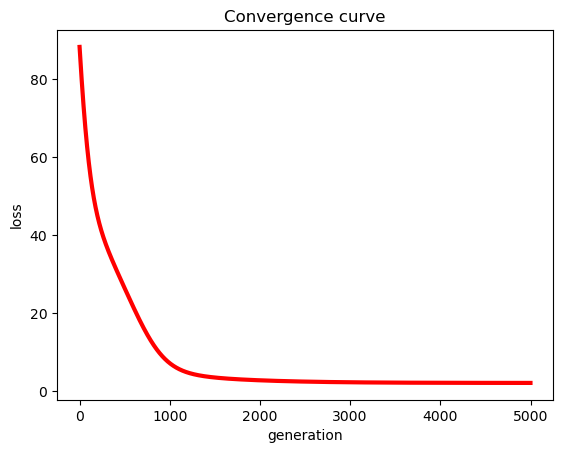

In [8]:
#-------------損失関数の収束グラフです---------------

n=len(error_result)
x=range(n)
plt.plot(x,error_result,color='r',linewidth=3)
plt.title("Convergence curve")
plt.xlabel("generation")
plt.ylabel("loss")
plt.show()  #左から右へと下降し収束していく曲線です